In [1]:
import os, sys, gc
sys.path.insert(1, os.path.join(sys.path[0], '../../MDR_analysis/'))
sys.path.insert(1, os.path.join(sys.path[0], '../../test_contacts/contacts/contacts/'))
# print(sys.path)
from MDR_base import *
import MDR_plot

Can't load CuPy, contact fingerprint will not run


In [2]:
# If load dump
# import pickle
# with open('MDR_dump.pkl','rb') as f:
#     MDR = pickle.load(f)

In [3]:
MDR = MolecularDynamicsRefinement(simulationPrefixes=['EM','QR','MD'],ligand_res=58)
MDR.createLigands()
MDR.gatherMagnitude()

In this dataset, there are:
   44 different molecules
  880 different poses
   880 EM   |    44000 frames |      44.00 nanoseconds
  1760 QR   |    88000 frames |    1760.00 nanoseconds |   485 qualified poses
  9700 MD   |  1940000 frames |  194000.00 nanoseconds


In [4]:
MDR.calculateRMSD_parallel()

Loading PV-001792285514 successful
Loading PV-001801306793 successful
Loading PV-001841410851 successful
Loading Z1096208223 successful
Loading Z1096208227 successful
Loading Z1096215707 successful
Loading Z1096224236 successful
Loading Z1096224331 successful
Loading Z1096224815 successful
Loading Z1096226468 successful
Loading Z1530716281 successful
Loading Z1530717425 successful
Loading Z1530718726 successful
Loading Z1530723212 successful
Loading Z1530723244 successful
Loading Z1530724813 successful
Loading Z1530724846 successful
Loading Z1530724963 successful
Loading Z1530725178 successful
Loading Z1530783858 successful
Loading Z1530786342 successful
Loading Z1530786956 successful
Loading Z1530789835 successful
Loading Z1530791178 successful
Loading Z1530795629 successful
Loading Z1530797787 successful
Loading Z1530800067 successful
Loading Z1530800272 successful
Loading Z1552756239 successful
Loading Z1554962222 successful
Loading Z1593752771 successful
Loading Z1593752786 success

In [5]:
import MDR_cluster
from MDR_cluster import gimme_best_pose

Can't load CuPy, fall back to numba


In [6]:
print(MDR.Ligands.keys())

dict_keys(['PV-001792285514', 'PV-001801306793', 'PV-001841410851', 'Z1096208223', 'Z1096208227', 'Z1096215707', 'Z1096224236', 'Z1096224331', 'Z1096224815', 'Z1096226468', 'Z1530716281', 'Z1530717425', 'Z1530718726', 'Z1530723212', 'Z1530723244', 'Z1530724813', 'Z1530724846', 'Z1530724963', 'Z1530725178', 'Z1530783858', 'Z1530786342', 'Z1530786956', 'Z1530789835', 'Z1530791178', 'Z1530795629', 'Z1530797787', 'Z1530800067', 'Z1530800272', 'Z1552756239', 'Z1554962222', 'Z1593752771', 'Z1593752786', 'Z1651778975', 'Z1651778988', 'Z1689537848', 'Z1692806105', 'Z1715997312', 'Z1743649707', 'Z1832772406', 'Z1852391924', 'Z1927517858', 'Z2033493182', 'Z2044131801', 'Z2206734379'])


In [7]:
# for i in range(20):
# print(MDR.Ligands['Z1096208223'].Poses['13'].traj['MD'][1].RMSD)

In [8]:
# v

In [6]:
test_this_one = 'Z1530718726' # The one with xtal structure
# test_this_one = 'Z1530724963' # The one with xtal structure
test_this_one = 'Z1530724813' # The one with xtal structure
# test_this_one = 'Z1096208223' # the O in the ring faces His 163
# test_this_one = 'Z1096208227'
# test_this_one = 'Z1096215707'
# test_this_one = 'Z1530725178'
# test_this_one = 'Z1530786342'

import MDR_cluster
importlib.reload(MDR_cluster)
from MDR_cluster import gimme_best_pose
_, _, v, comp, actualComp = gimme_best_pose(MDR, ligand=test_this_one, top_select=3, plot=False, metric='vdW',
                                min_size_multiplier=1, cluster_min_samples=10, eps=0.7, speed=5000, 
                                filter_dist=True, filter_dist_thres=10, show_pose=True,
                                rank=None,outputPDB=False, ligand_res=58)
v

Can't load CuPy, fall back to numba
Stride factor is 10 (number of frames: 5400)


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


RMSD calculation done on 5400 frames.
Clustering done
Selected clusters are: [2 1 9]
RMSD of the clusters : [1.7199136144271994, 2.5696102452810416, 4.103762328858626] PASS
Lowest possible RMSD : 1.9420556616098295


NGLWidget()

In [7]:
# Diagnosing poses
import nglview
from nglview.player import TrajectoryPlayer

poseNum1 = 2
poseNum2 = 2
view = nglview.NGLWidget() 
view.camera = 'orthographic'
colors = ['red','orange','yellow','green','blue','purple']
c1 = view.add_trajectory(comp[poseNum1])
c1.clear()

c1.add_cartoon(selection="protein", opacity=0.5)
c1.add_licorice(selection='33')
c1.add_licorice(selection="protein",opacity=0.25)
c1.add_ball_and_stick(selection='58',color='red',opacity=0.6)
c2 = view.add_trajectory(actualComp[poseNum2])
c2.clear()
c2.add_licorice(selection="protein", opacity=0.5)
c2.add_ball_and_stick(selection='58',color='orange',opacity=0.6)

view

NGLWidget()

In [8]:
actualComp

{2: <mdtraj.Trajectory with 1 frames, 844 atoms, 59 residues, without unitcells at 0x7ffa740817c0>,
 1: <mdtraj.Trajectory with 1 frames, 844 atoms, 59 residues, without unitcells at 0x7ffa6c43ec40>,
 9: <mdtraj.Trajectory with 1 frames, 844 atoms, 59 residues, without unitcells at 0x7ffa6c322ca0>}

In [10]:
selected_cluster = 2
sc = selected_cluster
selectComp = actualComp

selectComp[sc].top.select('resid 58')
crystalComp = md.load(MDR.Ligands[test_this_one].crystalPose, top=MDR.Ligands[test_this_one].prmtop)

print(np.sqrt(np.mean(((selectComp[sc].xyz[0][selectComp[sc].top.select('resid 58')]*10 - \
  crystalComp.xyz[0][crystalComp.top.select('resid 58')]*10)**2).sum(1))))

print(np.sqrt(((selectComp[sc].xyz[0][selectComp[sc].top.select('resid 58')]*10 - \
  crystalComp.xyz[0][crystalComp.top.select('resid 58')]*10)**2).sum(1)))

b_factor = np.concatenate(
    (selectComp[sc].top.select('not resid 58')*0,
    np.sqrt(((selectComp[sc].xyz[0][selectComp[sc].top.select('resid 58')]*10 - \
  crystalComp.xyz[0][crystalComp.top.select('resid 58')]*10)**2).sum(1)) )
)

1.7169975
[2.2702675  1.1719202  4.006734   1.0139068  1.1704211  1.2769855
 1.1248013  0.9183547  1.0256782  0.7270056  0.69153136 0.21116583
 0.41445038 1.8369589  1.5571941  1.2314402  1.4392672  1.7176532
 2.283272   2.3453474  3.1727297  1.6671785  1.4256454  1.2372212
 1.2368665  1.0298942  0.12828404 0.5166857  2.0594873  1.8509327
 1.5123756  1.8298546  2.07747    3.0475755 ]


In [11]:
selectComp[sc][0].save_pdb(f'show_RMSD_{test_this_one}_cluster_{sc}_actualComp.pdb',bfactors=b_factor)

array([2.7794764 , 1.3083025 , 4.785302  , 0.941958  , 0.8913795 ,
       0.9289364 , 0.76381725, 0.5368003 , 0.63921964, 0.6905866 ,
       0.909492  , 0.9505838 , 0.8825516 , 2.3753839 , 2.8946993 ,
       2.3394773 , 3.662856  , 3.665063  , 2.2066846 , 5.7103863 ,
       2.6442063 , 2.738304  , 2.0122237 , 1.1674339 , 1.0564097 ,
       1.0686332 , 1.2513686 , 1.2087475 , 1.1719562 , 3.194677  ,
       4.3791995 , 3.691491  , 2.8600745 , 5.1615305 , 2.2015839 ,
       3.809402  , 4.201542  ], dtype=float32)

In [55]:
test_this_one = 'Z1530718726' # The one with xtal structure
test_this_one = 'Z1530724963' # The one with xtal structure
test_this_one = 'Z1530724813'
# test_this_one = 'Z1096208223' # the O in the ring faces His 163
# test_this_one = 'Z1096208227'
# test_this_one = 'Z1096215707'
# test_this_one = 'Z1530725178'
# test_this_one = 'Z1530786342'

import MDR_cluster
importlib.reload(MDR_cluster)
from MDR_cluster import gimme_best_pose
for test_this_one in MDR.Ligands.keys():
    try:
        _, _, v, comp, actualComp = gimme_best_pose(MDR, ligand=test_this_one, top_select=5, plot=False, metric='vdW',
                                min_size_multiplier=1, cluster_min_samples=15, eps=0.7, speed=5000, ligand_res=58,
                                filter_dist=True, filter_dist_thres=10, show_pose=False,
                                rank=1,outputPDB=True)
    except:
        continue
v

Can't load CuPy, fall back to numba
Stride factor is 5 (number of frames: 5040)
RMSD calculation done on 5040 frames.
Clustering done
Using ranked reference
No crystal comp found - using pose 1 instead. RMSD will be meaningless
Selected clusters are: [ 9 21  4  6 18]
RMSD of the clusters : [6.799324507270624, 5.25235640392099, 4.319328511608005, 4.920760730588771, 7.753039814646848] NOTE: these values are meaningless - they are compared to predicted pose 1
Stride factor is 10 (number of frames: 5400)
RMSD calculation done on 5400 frames.
Clustering done
Using ranked reference
No crystal comp found - using pose 1 instead. RMSD will be meaningless
Selected clusters are: [23 10 15  3  4]
RMSD of the clusters : [7.989802057202458, 1.6076703563684651, 4.637726302446238, 3.416261980058841, 2.889358632485488] NOTE: these values are meaningless - they are compared to predicted pose 1
Stride factor is 9 (number of frames: 5200)
RMSD calculation done on 5200 frames.
Clustering done
Using ranked 

[]

In [12]:
# ligand_map = {'A': 0, 'C': 0, 'N': 1, 'NA': 1, 'O': 2, 'OA': 2, 'F': 3, 'P': 4, 'S': 5, 'SA': 5, 'CL': 6,
#               'BR': 7, 'I': 8}
# protein_map = {'A': 0, 'C': 0, 'N': 1, 'NA': 1, 'O': 2, 'OA': 2, 'S': 3, 'SA': 3}


# pro = actualComp[14].top.select("not residue 56 and not symbol H")
# proteinCoordinate = actualComp[14].xyz[0][pro]*10
# proteinType = np.array([protein_map[x.element.symbol.upper()] for x in np.array(list(actualComp[14].top.atoms))[pro]])
# lig = actualComp[14].top.select("residue 56 and not symbol H")
# ligandCoordinate = actualComp[14].xyz[0][lig]*10
# baseLigandType = np.array([ligand_map[x.element.symbol.upper()] for x in np.array(list(actualComp[14].top.atoms))[lig]])

In [13]:
import oddt
from oddt import scoring
from oddt.scoring.functions import RFScore
import numpy as np
try:
    rf
except:
    rf = RFScore.rfscore(version=2)
    rf.train()

Training RFScore v2 on PDBBind v2016
Test set:	R2_score: 0.5708	Rp: 0.8089	RMSE: 1.4238	SD: 1.2801
Train set:	R2_score: 0.8946	Rp: 0.9611	RMSE: 0.6478	SD: 0.5510
OOB set:	R2_score: 0.5450	Rp: 0.7418	RMSE: 1.3459	SD: 1.3382


In [14]:
import contact
importlib.reload(contact)

for ii in actualComp.keys():
    f = contact.contact(actualComp[ii])
    print(ii, rf.model.predict(f))


5 [4.58688561]
29 [4.52918957]
15 [6.0109256]
18 [5.43492299]
13 [5.7469425]


In [49]:
type(f)

numpy.ndarray

### Prepare aligned pose to compare to crystal structure for '726

In [132]:
crys = mdtraj.load('reference_structures/mpro_NCEnam-726_refine_11_final.pdb')

In [133]:
crys_res = list(range(25,28)) + list(range(40,55)) + list(range(140,146)) + list(range(161,173)) + list(range(181,191))
counter = 0
crys_comp_map = {}
for res in comp[14].top.residues:
    if res.name == 'ACE' or res.name == 'NME' or res.name == 'LIG':
        pass
    else:
#         print(res.index)
        crys_comp_map[counter] = crys_res[counter]
        counter += 1
#         print(res.name)
print(crys_comp_map)

{0: 25, 1: 26, 2: 27, 3: 40, 4: 41, 5: 42, 6: 43, 7: 44, 8: 45, 9: 46, 10: 47, 11: 48, 12: 49, 13: 50, 14: 51, 15: 52, 16: 53, 17: 54, 18: 140, 19: 141, 20: 142, 21: 143, 22: 144, 23: 145, 24: 161, 25: 162, 26: 163, 27: 164, 28: 165, 29: 166, 30: 167, 31: 168, 32: 169, 33: 170, 34: 171, 35: 172, 36: 181, 37: 182, 38: 183, 39: 184, 40: 185, 41: 186, 42: 187, 43: 188, 44: 189, 45: 190}


In [133]:
crys_res = list(range(25,28)) + list(range(40,55)) + list(range(140,146)) + list(range(161,173)) + list(range(181,191))
counter = 0
crys_comp_map = {}
for res in comp[14].top.residues:
    if res.name == 'ACE' or res.name == 'NME' or res.name == 'LIG':
        pass
    else:
#         print(res.index)
        crys_comp_map[counter] = crys_res[counter]
        counter += 1
#         print(res.name)
print(crys_comp_map)

{0: 25, 1: 26, 2: 27, 3: 40, 4: 41, 5: 42, 6: 43, 7: 44, 8: 45, 9: 46, 10: 47, 11: 48, 12: 49, 13: 50, 14: 51, 15: 52, 16: 53, 17: 54, 18: 140, 19: 141, 20: 142, 21: 143, 22: 144, 23: 145, 24: 161, 25: 162, 26: 163, 27: 164, 28: 165, 29: 166, 30: 167, 31: 168, 32: 169, 33: 170, 34: 171, 35: 172, 36: 181, 37: 182, 38: 183, 39: 184, 40: 185, 41: 186, 42: 187, 43: 188, 44: 189, 45: 190}


In [134]:
crys_CA_all = list(crys.top.atoms_by_name('CA'))
comp_CA_all = list(comp[14].top.residues)
comp_CA_all = list(comp[14].top.atoms_by_name('CA'))

In [135]:
crys_CA = []
comp_CA = []
for ii in crys_comp_map.keys():
#     print(crys_CA_all[crys_comp_map[ii]-1], comp_CA_all[ii])
    crys_CA.append(crys_CA_all[crys_comp_map[ii]-1].index)
    comp_CA.append(comp_CA_all[ii].index)
print(crys_CA)
print(comp_CA)

[173, 180, 187, 292, 303, 313, 320, 328, 334, 341, 347, 356, 364, 372, 380, 388, 395, 403, 1078, 1089, 1097, 1105, 1109, 1115, 1233, 1245, 1253, 1263, 1273, 1281, 1290, 1298, 1305, 1312, 1316, 1323, 1386, 1397, 1409, 1413, 1420, 1431, 1438, 1446, 1457, 1466]
[8, 22, 36, 67, 91, 108, 124, 143, 154, 168, 179, 194, 206, 223, 242, 264, 270, 284, 317, 337, 356, 370, 377, 388, 411, 432, 449, 466, 483, 500, 515, 542, 548, 562, 569, 585, 614, 634, 655, 670, 676, 696, 712, 724, 748, 765]


In [111]:
for idx, ii in enumerate(comp.keys()):
    comp[ii].superpose(crys,atom_indices=comp_CA,ref_atom_indices=crys_CA)
    comp[ii].save(f'Refined_Poses/Z1530718726/Pose{idx}_aligned.pdb')

In [142]:
dock = mdtraj.load(MDR.Ligands['Z1530718726'].Poses['4'].initialPose, top=MDR.Ligands['Z1530718726'].prmtop)
dock.superpose(crys,atom_indices=comp_CA,ref_atom_indices=crys_CA)
dock.save(f'Refined_Poses/Z1530718726/Autodock_pose4_aligned.pdb')

In [109]:
import nglview
from nglview.player import TrajectoryPlayer
view = nglview.NGLWidget() 
view.camera = 'orthographic'

c1 = view.add_trajectory(comp[14])
c2 = view.add_trajectory(crys)
c1.clear()
c1.add_cartoon(selection='protein')
c1.add_licorice(selection='protein and not hydrogen', opacity=0.3)
c1.add_licorice(selection='33')
c1.add_CPK(selection='56')
c2.add_licorice(selection='163')
view

AttributeError: 'ComponentViewer' object has no attribute 'add_CPK'

### Prepare aligned pose to compare to crystal structure for '963

In [144]:
crys = mdtraj.load('reference_structures/Mpro_NonCov_Enam963_refine_11_final.pdb')

In [145]:
crys_res = list(range(25,28)) + list(range(40,55)) + list(range(140,146)) + list(range(161,173)) + list(range(181,191))
counter = 0
crys_comp_map = {}
fkey = list(comp.keys())[0]
for res in comp[fkey].top.residues:
    if res.name == 'ACE' or res.name == 'NME' or res.name == 'LIG':
        pass
    else:
#         print(res.index)
        crys_comp_map[counter] = crys_res[counter]
        counter += 1
#         print(res.name)
print(crys_comp_map)

{0: 25, 1: 26, 2: 27, 3: 40, 4: 41, 5: 42, 6: 43, 7: 44, 8: 45, 9: 46, 10: 47, 11: 48, 12: 49, 13: 50, 14: 51, 15: 52, 16: 53, 17: 54, 18: 140, 19: 141, 20: 142, 21: 143, 22: 144, 23: 145, 24: 161, 25: 162, 26: 163, 27: 164, 28: 165, 29: 166, 30: 167, 31: 168, 32: 169, 33: 170, 34: 171, 35: 172, 36: 181, 37: 182, 38: 183, 39: 184, 40: 185, 41: 186, 42: 187, 43: 188, 44: 189, 45: 190}


In [146]:
crys_CA_all = list(crys.top.atoms_by_name('CA'))
comp_CA_all = list(comp[fkey].top.residues)
comp_CA_all = list(comp[fkey].top.atoms_by_name('CA'))

In [147]:
crys_CA = []
comp_CA = []
for ii in crys_comp_map.keys():
#     print(crys_CA_all[crys_comp_map[ii]-1], comp_CA_all[ii])
    crys_CA.append(crys_CA_all[crys_comp_map[ii]-1].index)
    comp_CA.append(comp_CA_all[ii].index)
print(crys_CA)
print(comp_CA)

[173, 180, 187, 292, 303, 313, 320, 328, 334, 341, 347, 356, 364, 372, 380, 388, 395, 403, 1078, 1089, 1097, 1105, 1109, 1115, 1233, 1245, 1253, 1263, 1273, 1281, 1290, 1298, 1305, 1312, 1316, 1323, 1386, 1397, 1409, 1413, 1420, 1431, 1438, 1446, 1457, 1466]
[8, 22, 36, 67, 91, 108, 124, 143, 154, 168, 179, 194, 206, 223, 242, 264, 270, 284, 317, 337, 356, 370, 377, 388, 411, 432, 449, 466, 483, 500, 515, 542, 548, 562, 569, 585, 614, 634, 655, 670, 676, 696, 712, 724, 748, 765]


In [121]:
for idx, ii in enumerate(comp.keys()):
    comp[ii].superpose(crys,atom_indices=comp_CA,ref_atom_indices=crys_CA)
    comp[ii].save(f'Refined_Poses/Z1530724963/Pose{idx}_aligned.pdb')

In [152]:
dock = mdtraj.load(MDR.Ligands['Z1530724963'].Poses['4'].initialPose, top=MDR.Ligands['Z1530724963'].prmtop)
dock.superpose(crys,atom_indices=comp_CA,ref_atom_indices=crys_CA)
dock.save(f'Refined_Poses/Z1530724963/Autodock_pose4_aligned.pdb')

In [125]:
import nglview
from nglview.player import TrajectoryPlayer
view = nglview.NGLWidget() 
view.camera = 'orthographic'

c1 = view.add_trajectory(comp[fkey])
c2 = view.add_trajectory(crys)
c1.clear()
c1.add_cartoon(selection='protein')
c1.add_licorice(selection='protein and not hydrogen', opacity=0.3)
c1.add_licorice(selection='HIS', opacity=0.5)
c1.add_licorice(selection='33')
c1.add_licorice(selection='56')
c2.add_licorice(selection='163')
view

NGLWidget()

In [40]:
MDR.Ligands['Z2077732466'].Poses['1'].traj['MD']

In [ ]:


import nglview
from nglview.player import TrajectoryPlayer
ligand='Mpro-x10959'
view = nglview.NGLWidget() 
view.camera = 'orthographic'
ref_pose = mdtraj.load(f'reference_structure/{ligand}_0A.inpcrd',top=f'reference_structure/{ligand}.prmtop')
colors = ['red','orange','yellow','green','blue','purple']
comp = mdtraj.load_mdcrd(f'Simulation/{ligand}_0/MD_R1.nc',top=f'Structure/prmtop/{ligand}.prmtop')
comp.superpose(ref_pose, atom_indices=range(700))
c = view.add_trajectory(comp)
c.clear()

c.add_cartoon(selection="protein")
#                 c[ii].add_surface(selection="protein", opacity=0.3)
c.add_licorice(selection='33')
c.add_licorice(selection="protein",opacity=0.25)
# c.add_licorice(selection='56',color,opacity=0.6)/
c.add_ball_and_stick(selection='56',opacity=1)
c2 = view.add_trajectory(ref_pose[-1])
c2.clear()
c2.add_ball_and_stick(selection='56',color='red',opacity=0.6)

view

In [9]:
import nglview
from nglview.player import TrajectoryPlayer
ligand='Mpro-x10959'
view = nglview.NGLWidget() 
view.camera = 'orthographic'
c = {}
comp = {}
actualComp = {}
ac = {}
ref_pose = mdtraj.load(f'reference_structure/{ligand}_0A.inpcrd',top=f'reference_structure/{ligand}.prmtop')
colors = ['red','orange','yellow','green','blue','purple']
for idx, ii in enumerate(np.arange(12,18, dtype=int)):
    comp[ii] = mdtraj.load(f'Structure/inpcrd/{ligand}_{ii}.inpcrd',top=f'Structure/prmtop/{ligand}.prmtop')
    c[ii] = view.add_trajectory(comp[ii])
    c[ii].clear()
    if idx == 0:
        c[ii].add_cartoon(selection="protein")
#                 c[ii].add_surface(selection="protein", opacity=0.3)
        c[ii].add_licorice(selection='33')
        c[ii].add_licorice(selection="protein",opacity=0.25)
    c[ii].add_licorice(selection='56',color=colors[idx%6],opacity=0.6)
#             c[ii].add_ball_and_stick(selection='56',opacity=0.3)
c2 = view.add_trajectory(ref_pose[-1])
c2.clear()
c2.add_ball_and_stick(selection='56')

view

NGLWidget()

In [65]:
importlib.reload(MDR_cluster)
from MDR_cluster import gimme_best_pose
gimme_best_pose(MDR, ligand=test_this_one, top_select=2, filter_dist=True, plot=True, min_size_multiplier=1, cluster_min_samples=5, eps=0.5)

Can't load CuPy, fall back to numba
Stride factor is 4 (number of frames: 17130)


KeyboardInterrupt: 

(array([ 0.,  1., 12., 20.,  9., 13.,  8.,  3.,  4.,  0.,  0.,  1.,  3.,
         2.,  2.,  0.,  0.,  1.,  0.,  0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 20 artists>)

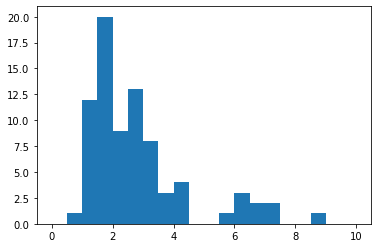

In [14]:
import matplotlib.pyplot as plt
plt.hist(rmsd_group, bins=np.linspace(0,10,21))
# plt.plot(rmsd_group, np.zeros_like(rmsd_group),'x')
# plt.xlim([0,10])


In [28]:
print(len([True for ii in rmsd_group if ii < 2.5]))
print(len(rmsd_group))

42

In [99]:
print(len([True for ii in rmsd_group if ii < 2.5]))
print(len(rmsd_group))

45
80


In [101]:
print(len([True for ii in rmsd_group if ii < 2.5]))
print(len(rmsd_group))

49
80


In [16]:
print(len([True for ii in rmsd_group if np.min(ii) < 2.5]))
print(len(rmsd_group))

45
82


In [22]:
rmsd_grouproup = np.array(rmsd_group)
print(len([True for ii in rmsd_group if np.min(ii) < 2.5]))
print(len(rmsd_group))

49
81


<ipython-input-22-f3b5a9008d96>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  rmsd_grouproup = np.array(rmsd_group)


In [13]:
rmsd_grouproup = np.array(rmsd_group)
print(len([True for ii in rmsd_group if np.min(ii) < 2.5]))
print(len(rmsd_group))

51
81


In [74]:
rmsd_grouproup = np.array(rmsd_group)
print(len([True for ii in rmsd_group if np.min(ii) < 2.5]))
print(len(rmsd_group))

51
81


In [76]:
rmsd_grouproup = np.array(rmsd_group)
print(len([True for ii in rmsd_group if np.min(ii) < 2.5]))
print(len(rmsd_group))

54
81


In [78]:
rmsd_grouproup = np.array(rmsd_group)
print(len([True for ii in rmsd_group if np.min(ii) < 2.5]))
print(len(rmsd_group))

54
81


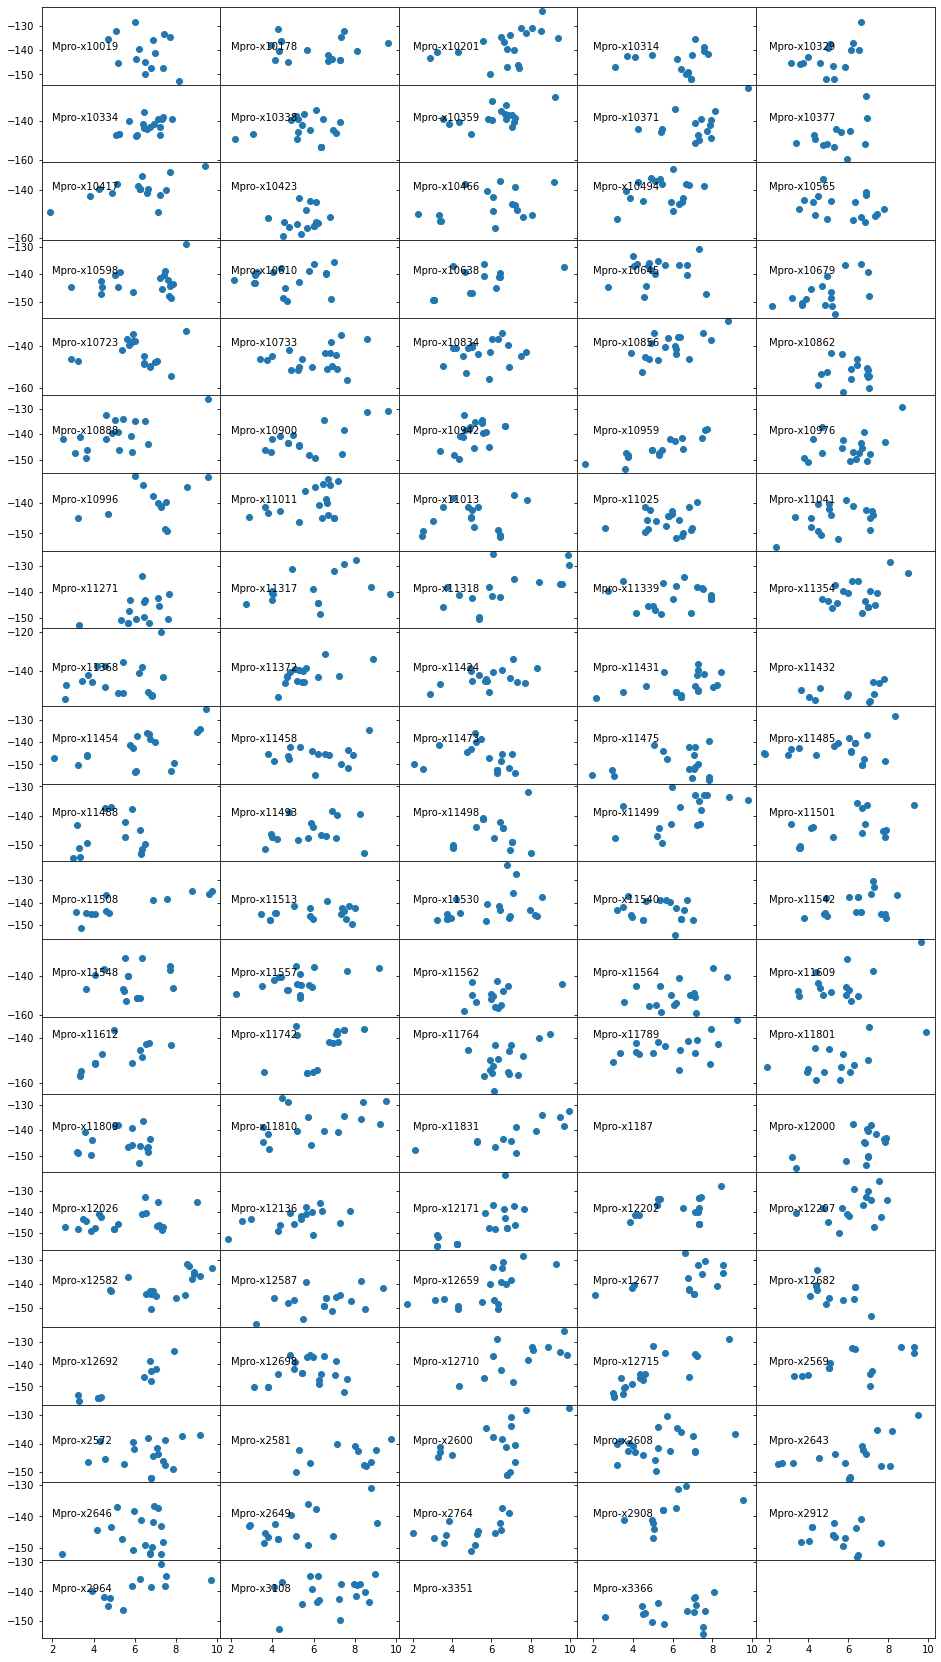

In [39]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(16,30), nrows=(len(MDR.Ligands)+5)//5, ncols=5, sharex='col', sharey='row')
for idx, ligKey in enumerate(MDR.Ligands.keys()):
    rmsd_end = []
    vdW_end = []
    for poseKey in MDR.Ligands[ligKey].Poses.keys():
        if MDR.Ligands[ligKey].Poses[poseKey].traj['EM'][0].RMSD[-1] < 10 and \
        MDR.Ligands[ligKey].Poses[poseKey].traj['EM'][0].output['vdW'].values[-1] < 0:
            rmsd_end.append(MDR.Ligands[ligKey].Poses[poseKey].traj['EM'][0].RMSD[-1])
            vdW_end.append(MDR.Ligands[ligKey].Poses[poseKey].traj['EM'][0].output['vdW'].values[-1])
    axs[idx//5, idx%5].scatter(rmsd_end, vdW_end)
    axs[idx//5, idx%5].text(2, -140, f'{ligKey}')
    
fig.subplots_adjust(wspace=0.00, hspace=0.00)
#     axs[idx//5, idx%5].set_xlim([0,10])
#     axs[idx//5, idx%5].set_ylim([-200,0])
    

In [19]:
MDR.Ligands[ligKey].Poses[poseKey].traj['EM'][0]